<a href="https://colab.research.google.com/github/Utpal-Mishra/Omdena-Malaysia-2021-Climate-Risk-Prediction-Part1/blob/main/OmdenaMalaysia2021ClimateRiskPredictionPart1MIRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORT DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

print("Drive Mounted!!!")

Mounted at /content/drive
Drive Mounted!!!


### **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pandas.plotting import autocorrelation_plot

!pip install pmdarima

print("Libraries Imported!!!")

     |████████████████████████████████| 1.5 MB 4.7 MB/s 
     |████████████████████████████████| 9.5 MB 19.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Libraries Imported!!!


### **IMPORT DATA**

In [ ]:
path = "/content/drive/MyDrive/Omdena/Malaysia 2021/Task 1 Climate Risk Prediction/14StationsData.csv"

data = pd.read_csv(path)
print("Data Shape: ", data.shape)
data.head()

Data Shape:  (194296, 10)


STATION                             NAME  LATITUDE  ...  TAVG  TMAX  TMIN
0  MYM00096471  KOTA KINABALU INTERNATIONAL, MY     5.937  ...  26.8  31.0  23.0
1  MYM00096471  KOTA KINABALU INTERNATIONAL, MY     5.937  ...  26.5  31.0  24.0
2  MYM00096471  KOTA KINABALU INTERNATIONAL, MY     5.937  ...  25.9  30.0  24.0
3  MYM00096471  KOTA KINABALU INTERNATIONAL, MY     5.937  ...  26.6  29.0  23.0
4  MYM00096471  KOTA KINABALU INTERNATIONAL, MY     5.937  ...  27.1  31.0  24.0

[5 rows x 10 columns]

## **EXPLORATORY DATA ANALYSIS**

### **Checking Missing Values**

In [ ]:
data.isna().sum()

STATION          0
NAME             0
LATITUDE         0
LONGITUDE        0
ELEVATION        0
DATE             0
PRCP         30373
TAVG          2893
TMAX         71659
TMIN         78357
dtype: int64

### **Replacing Missing Values with Column Means**

In [ ]:
data = data.fillna(data.mean())
print("Empty Values Left: ", data.isna().sum().sum())

Empty Values Left:  0


### **Frequency of Station Names in Malaysia**

In [ ]:
data.NAME.value_counts()

KUCHING, MY                                 14797
SANDAKAN, MY                                14792
LABUAN, MY                                  14791
SITIAWAN, MY                                14788
PENANG INTERNATIONAL, MY                    14756
KUANTAN, MY                                 14755
MALACCA, MY                                 14696
SULTAN ISMAIL PETRA, MY                     14686
SIBU, MY                                    14639
KOTA KINABALU INTERNATIONAL, MY             14607
MIRI, MY                                    14592
SULTAN ABDUL AZIZ SHAH INTERNATIONAL, MY    13952
TAWAU, MY                                   12410
KUALA LUMPUR INTERNATIONAL, MY               6035
Name: NAME, dtype: int64

### **DATA ANALYSIS and INTERPRETATION**

In [ ]:
import datetime

data["YEAR"] = data.DATE.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").year)
data["MONTH"] = data.DATE.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").month)

cleandata = data.groupby(['NAME', 'YEAR'], as_index = False).first()
print("Data Dimensions: ", cleandata.shape)
cleandata.tail()

Data Dimensions:  (543, 12)


NAME  YEAR      STATION  LATITUDE  ...  TAVG       TMAX       TMIN  MONTH
538  TAWAU, MY  2017  MYM00096481     4.313  ...  25.6  30.900000  23.737928      1
539  TAWAU, MY  2018  MYM00096481     4.313  ...  27.0  31.793158  22.900000      1
540  TAWAU, MY  2019  MYM00096481     4.313  ...  27.2  31.793158  23.500000      1
541  TAWAU, MY  2020  MYM00096481     4.313  ...  28.0  31.793158  23.737928      1
542  TAWAU, MY  2021  MYM00096481     4.313  ...  25.4  31.793158  23.737928      1

[5 rows x 12 columns]

In [ ]:
fig = go.Figure()
fig = px.bar(cleandata, x='NAME', y="TAVG", animation_frame = "DATE", color = "TAVG", text='TAVG')
# fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
fig.update_xaxes(title_text = "State Names in Malaysia", linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Temperature", showline=True, linewidth=1, linecolor='black', mirror=True)
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(height=600, width=1200, title_text="Temperature in Malaysia", barmode='group', xaxis_tickangle=-45, yaxis_range=[0,120]) 
fig.show()

In [ ]:
# fig = go.Figure()
# fig = px.bar(cleandata, x='NAME', y="PRCP", animation_frame = "DATE", color = "PRCP", text='PRCP')
# # fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
# fig.update_xaxes(title_text = "State Names in Malaysia", linewidth=1, linecolor='black', mirror=True)
# fig.update_yaxes(title_text = "Precipitation", showline=True, linewidth=1, linecolor='black', mirror=True)
# # fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(height=600, width=1200, title_text="Precipitation in Malaysia", barmode='group', xaxis_tickangle=-45, yaxis_range=[0,120]) 
# fig.show()

fig = go.Figure()
fig = px.scatter(cleandata, x="NAME", y="PRCP", animation_frame="DATE",
           size="PRCP", color="NAME", hover_name="NAME",
           log_x=False, range_y=[0, 120])
fig.update_xaxes(title_text = "State Names in Malaysia", linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Precipitation", showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(height=600, width=1500, title_text="Precipitation in Malaysia", barmode='group', xaxis_tickangle=-45, yaxis_range=[0,120]) 
fig.show()

## **PLOTS**

### **Plotting Functions**

In [ ]:
def temperature(df):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=df.DATE, y=df.TAVG, mode='lines', name='tavg lines'))
  fig.add_trace(go.Scatter(x=df.DATE, y=df.TMIN, mode='lines', name='tmin lines'))
  fig.add_trace(go.Scatter(x=df.DATE, y=df.TMAX, mode='lines', name='tmax lines'))
  fig.update_xaxes(title_text = "DATE", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_yaxes(title_text = "TEMPERATURE", showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_layout(height=450, width=1000, title_text="Observation of Tmin, Tavg, Tmax in Different Parts of Malaysia") 
  fig.show()


def precipitation(df):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=df.DATE, y=df.PRCP, mode='lines', name='tavg lines'))
  fig.update_xaxes(title_text = "DATE", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_yaxes(title_text = "PRECIPITATION", showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_layout(height=450, width=1000, title_text="Precipitation in Parts of Malaysia") 
  fig.show()



def map(df):
  fig = px.scatter_geo(df, 
                     lat='LATITUDE', 
                     lon='LONGITUDE', 
                     size='PRCP', 
                     animation_frame="DATE", 
                     title='PRECIPITATION in MALAYSIA', 
                     projection = "orthographic", 
                     width = 1000,
                     height = 500, 
                     color = "NAME")
  fig.update(layout_coloraxis_showscale=False)
  fig.show()

In [ ]:
map(cleandata)

### **MIRI, MY**

**TEMPERATURE ANALYSIS**

In [ ]:
df = data[data.NAME == "MIRI, MY"]

temperature(df)

**PRECIPITATION**

In [ ]:
precipitation(df)

In [ ]:
map(df.head(100))

# **FORECASTING**

## **Forecasting Precipitation**

In [ ]:
forecast = data[data.NAME == "MIRI, MY"][["DATE", "PRCP"]]
forecast.set_index('DATE',inplace=True)
forecast

PRCP
DATE            
1981-01-01  51.0
1981-01-02  31.0
1981-01-03  26.0
1981-01-04   1.0
1981-01-05  83.0
...          ...
2021-07-09   6.1
2021-07-10   2.3
2021-07-11  12.2
2021-07-12  13.0
2021-07-13   0.0

[14792 rows x 1 columns]

In [ ]:
forecast.describe()

PRCP
count  14792.000000
mean       9.023869
std       19.785923
min        0.000000
25%        0.000000
50%        1.000000
75%        8.021009
max      403.000000

In [ ]:
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast.PRCP, name = "Precipitation Record", line=dict(color='purple', width=4, dash = "dot")))
fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "PRECIPIATION", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Malaysia Precipitation Record')
fig.show()

### **Testing For Stationarity**

In [ ]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(forecast.PRCP)

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(prcp):
    result = adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
      
adfuller_test(forecast.PRCP)

ADF Test Statistic : -18.791166582748545
p-value : 2.0234554351188463e-30
#Lags Used : 23
Number of Observations Used : 14768
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


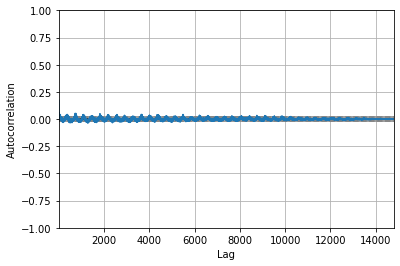

In [ ]:
autocorrelation_plot(forecast.PRCP)
plt.show()

### **ARIMA MODEL**

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(forecast['PRCP'], trace=True, suppress_warnings=True)

In [ ]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)

model = ARIMA(forecast.PRCP, order=(1,1,3))
results = model.fit()
results.summary()

forecast['Forecast'] = results.predict(start = "2021-01-01", end = "2021-07-13", dynamic=True)
# forecast[['PRCP','Forecast']].plot(figsize=(12,8))

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['TAVG'], name = "Recorded Recipitation", line=dict(color='blue', width=3, dash = "dash")))
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Forecast'], name = "Seasonal First Difference Precipitation Record", line=dict(color='red', width=3, dash = "dot")))
fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "TEMPERATURE", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Malaysia Seasonal First Difference Precipitation Record')
fig.show()

In [ ]:
prediction = pd.DataFrame(results.predict(start = "2021-01-01", end = "2021-07-13", dynamic=True))
prediction.rename(columns = {"predicted_mean":'Predicted PRCP'}, inplace = True)
prediction

### **SARIMAX MODEL**

In [ ]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(forecast.PRCP, order=(5, 1, 0))
results = model.fit()

forecast['Forecast'] = results.predict(start = "2020-01-01", end = "2021-07-13", dynamic=True)
# forecast[['PRCP','Forecast']].plot(figsize=(12,8))

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['PRCP'], name = "Recorded Precipitation", line=dict(color='blue', width=3, dash = "dot")))
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Forecast'], name = "Seasonal First Difference Precipitation Record", line=dict(color='red', width=3, dash = "dashdot")))
fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "PRECIPIATION", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Malaysia Seasonal First Difference Precipitation Record')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
prediction = pd.DataFrame(results.predict(start = "2021-01-01", end = "2021-07-13", dynamic=True))
prediction.rename(columns = {"predicted_mean":'Predicted PRCP'}, inplace = True)
prediction

Predicted PRCP
DATE                      
2021-01-01       24.354954
2021-01-02       25.954948
2021-01-03       28.728594
2021-01-04       34.290954
2021-01-05       38.054435
...                    ...
2021-07-09       31.331973
2021-07-10       31.331973
2021-07-11       31.331973
2021-07-12       31.331973
2021-07-13       31.331973

[191 rows x 1 columns]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['PRCP'], mode='lines+markers', name = "Recorded Precipitation", line=dict(color='blue', width=2, dash = "dash")))
fig.add_trace(go.Scatter(x = prediction.index, y = prediction['Predicted PRCP'], name = "Predicted Precipitation", line=dict(color='red', width=2, dash = "dot")))
fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "PRECIPIATION", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Malaysia Precipitation Prediction')
fig.show()

## **Forecasting Temperature**

In [ ]:
forecast = data[data.NAME == "MIRI, MY"][["DATE", "TAVG"]]
forecast.set_index('DATE',inplace=True)
forecast

TAVG
DATE            
1981-01-01  26.2
1981-01-02  24.8
1981-01-03  26.2
1981-01-04  26.4
1981-01-05  25.9
...          ...
2021-07-09  26.7
2021-07-10  27.0
2021-07-11  27.7
2021-07-12  28.1
2021-07-13  28.0

[14792 rows x 1 columns]

In [ ]:
forecast.describe()

TAVG
count  14792.000000
mean      27.559356
std        1.072826
min       21.300000
25%       26.900000
50%       27.600000
75%       28.300000
max       32.400000

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast.TAVG, name = "Precipitation Record", line=dict(color='firebrick', width=4)))
fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "TEMPERATURE", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Malaysia Precipitation Record')
fig.show()

### **Testing For Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(forecast.TAVG)

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(prcp):
    result = adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
      
adfuller_test(forecast.TAVG)

ADF Test Statistic : -10.819185976184992
p-value : 1.82403645885352e-19
#Lags Used : 29
Number of Observations Used : 14762
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
# forecast['TAVG First Difference'] = forecast['TAVG'] - forecast['TAVG'].shift(1)
# # forecast['TAVG'].shift(1)

# forecast['Seasonal First Difference'] = forecast['TAVG'] - forecast['TAVG'].shift(12)
# forecast.head(10)

# ## Again test dickey fuller test
# adfuller_test(forecast['Seasonal First Difference'].dropna())

# fig = px.line(forecast, x = forecast.index, y = forecast['Seasonal First Difference'])
# fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Seasonal First Difference'], name = "Seasonal First Difference Precipitation Record", line=dict(color='firebrick', width=4)))
# fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
# fig.update_yaxes(title_text = "TEMPERATURE", showline=True, linewidth=2, linecolor='black', mirror=True)
# fig.update_layout(height=500, width=1000, title='Malaysia Seasonal First Difference Precipitation Record')
# fig.show()

# from pandas.plotting import autocorrelation_plot
# autocorrelation_plot(forecast.TAVG)
# plt.show()

# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# fig = plot_acf(forecast['Seasonal First Difference'])
# fig.show()

### **ARIMA MODEL**

In [ ]:
# from pmdarima import auto_arima
# stepwise_fit = auto_arima(forecast['TAVG'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=36887.069, Time=16.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=42207.824, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=39641.100, Time=1.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=37433.629, Time=4.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=42205.824, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=36790.898, Time=17.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=37001.803, Time=7.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=36883.807, Time=9.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=36785.086, Time=40.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=36879.908, Time=12.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=36794.524, Time=23.41 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=36786.316, Time=47.49 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=36841.906, Time=14.22 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=36788.911, Time=45.00 sec
 ARIMA(1,1,

In [ ]:
# import warnings
# from statsmodels.tsa.arima_model import ARIMA
# warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
# warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)

# model = ARIMA(forecast.TAVG, order=(1,1,3))
# results = model.fit()
# results.summary()

# forecast['Forecast'] = results.predict(start = "2021-01-01", end = "2021-07-13", dynamic=True)
# # forecast[['PRCP','Forecast']].plot(figsize=(12,8))

# fig = go.Figure()
# fig.add_trace(go.Scatter(x = forecast.index, y = forecast['TAVG'], name = "Recorded Recipitation", line=dict(color='blue', width=3, dash = "dash")))
# fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Forecast'], name = "Seasonal First Difference Precipitation Record", line=dict(color='red', width=3, dash = "dot")))
# fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
# fig.update_yaxes(title_text = "TEMPERATURE", showline=True, linewidth=2, linecolor='black', mirror=True)
# fig.update_layout(height=500, width=1000, title='Malaysia Seasonal First Difference Precipitation Record')
# fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



### **SARIMAX MODEL**

In [ ]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(forecast.TAVG, order=(5, 1, 0))
results = model.fit()

forecast['Forecast'] = results.predict(start = "2021-01-01", end = "2021-07-13", dynamic=True)
# forecast[['PRCP','Forecast']].plot(figsize=(12,8))

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['TAVG'], name = "Recorded Recipitation", line=dict(color='blue', width=3, dash = "dash")))
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Forecast'], name = "Seasonal First Difference Precipitation Record", line=dict(color='red', width=3, dash = "dot")))
fig.update_xaxes(title_text = "YEAR", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "TEMPERATURE", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Malaysia Seasonal First Difference Precipitation Record')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
prediction = pd.DataFrame(results.predict(start = "2021-01-01", end = "2021-07-13", dynamic=True))
prediction.rename(columns = {"predicted_mean":'Predicted TAVG'}, inplace = True)
prediction

Predicted TAVG
DATE                      
2021-01-01       26.274577
2021-01-02       26.483660
2021-01-03       26.514802
2021-01-04       26.370197
2021-01-05       26.242733
...                    ...
2021-07-09       26.343885
2021-07-10       26.343885
2021-07-11       26.343885
2021-07-12       26.343885
2021-07-13       26.343885

[191 rows x 1 columns]